In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
import numpy as np
import os
import imageio
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [114]:
def Base(N,D):
    init_0=np.zeros((N,N))
    init_sub=np.random.choice([0,1],size=N**2,p=[1-D,D])
    xx=0
    for i in range(0,N):
        for j in range(0,N):
            if (init_sub[xx]==1):
                init_0[i][j]=init_0[i][j]+init_sub[xx]
            xx+=1
        
    init_0=init_0.tolist()
    return init_0
def glider():
    glider=np.array([[0,1,0],[0,0,1],[1,1,1]])
    return glider

def addglider(A,coord,coord2):
        A=np.array(A)
        A[coord:coord+3,coord2:coord2+3]+=glider()
        return A
    
def Base2(N,D):
    init_0=np.zeros((N,N))
    xx=0
    for i in range(0,N):
        for j in range(0,N):
            if xx%D==0:
                init_0[i][j]=init_0[i][j]+1
            xx+=1
        
    init_0=init_0.tolist()
    return init_0


def grab2(i,j,init): 
    a=i+1
    b=j+1
    if (i==len(init)-1):
        a=0
    if (j==len(init)-1):
        b=0
    return init[a][j]+init[i-1][j]+init[i][b]+init[i][j-1]+init[a][b]+init[a][j-1]+init[i-1][j-1]+init[i-1][b]            
            
            
def natural_selection(init):
    initnew=np.zeros((len(init),len(init)))
    for i in range(0,len(init)):
        for j in range(0,len(init)):
            neighbors=grab2(i,j,init)
            if init[i][j]==1:
                if neighbors==2 or neighbors==3:
                    initnew[i][j]=1
                elif neighbors<2 or neighbors>3:
                    initnew[i][j]=0
                    #print('satisfied')
            if init[i][j]==0:
                if neighbors==3:
                    initnew[i][j]=1
    return initnew  
def recursive(init,N):
    """This is a recursive function
    to find the factorial of an integer"""
    try:
        while True:    
            plt.figure( figsize=(10,10) )
            plt.imshow(init, cmap='binary', interpolation='nearest')
            plt.show()
            clear_output(wait=True)
            initnew=natural_selection(init)
            return recursive(initnew,N)
    except:
        pass
    finally:
        pass
    
def spaceship():
    A=np.array([[1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1],
                [1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1],
                [1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1],
                [0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0],
                [0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0],
                [0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0],
                [0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0],
                [0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0],
                [0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0],
                [0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0]])
    return A

def addspaceship(A,coord,coord2):
        A=np.array(A)
        A[coord:coord+10,coord2:coord2+16]+=spaceship()
        return A



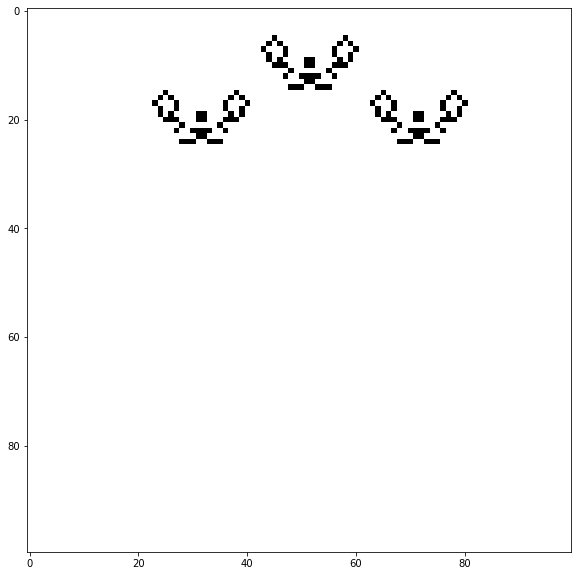

In [ ]:
recursive(addspaceship(
    addspaceship(
        addspaceship(
            Base(100,0)
            ,50,44),
                60,64),
                    60,24),100)